In [1]:
from NIDS import *

In [2]:
nids = NIDS_Manager("UNSW-NB15-BALANCED-TRAIN.csv", "s", "w")

In [3]:
#nids.get_csv()

In [4]:
#nids.x.head()

In [5]:
#print(nids.nids.loc[nids.nids['attack_cat'] == 9])

In [6]:
fa = FeatureAnalysis()
fa.rfecv_fit(nids.x, nids.get_y()[0])
fa.rfecv_x(nids.x)

,sport,dsport,sbytes,dbytes,sttl,dttl,Sload,Dload,Dpkts,swin,...,Djit,Stime,Ltime,Sintpkt,Dintpkt,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_dport_ltm,ct_dst_src_ltm
0,55490.0,53.0,146,178,31,29,5.561905e+05,6.780952e+05,2,0,...,0.000000,1421950270,1421950270,0.009000,0.002000,3,4,3,1,1
1,26756.0,21.0,2934,3738,31,29,5.398615e+03,6.882391e+03,54,255,...,192.298828,1421944870,1421944874,83.617101,80.451266,5,5,15,5,8
2,1043.0,53.0,114,0,254,0,1.520000e+08,0.000000e+00,0,0,...,0.000000,1424251725,1424251725,0.003000,0.000000,17,17,14,14,17
3,1043.0,53.0,114,0,254,0,1.520000e+08,0.000000e+00,0,0,...,0.000000,1424233686,1424233686,0.003000,0.000000,25,25,25,25,25
4,34472.0,10429.0,3718,43086,31,29,5.527504e+05,6.403988e+06,62,255,...,1.518598,1424244324,1424244324,0.863115,0.859525,5,8,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449791,12733.0,21.0,1072,1656,62,252,8.342483e+03,1.294354e+04,22,255,...,2492.014107,1424247824,1424247825,51.429842,45.471572,1,1,2,1,2
449792,1043.0,53.0,114,0,254,0,1.140000e+08,0.000000e+00,0,0,...,0.000000,1421930711,1421930711,0.004000,0.000000,16,16,7,7,7
449793,31192.0,27796.0,3182,35916,31,29,1.269280e+06,1.433623e+07,54,255,...,20.514445,1421960400,1421960400,0.378647,0.359472,2,8,1,1,1
449794,1043.0,53.0,114,0,254,0,4.560000e+07,0.000000e+00,0,0,...,0.000000,1424237594,1424237594,0.010000,0.000000,41,41,25,25,41


ValueError: x and y must have same first dimension, but have shapes (2,) and (7,)

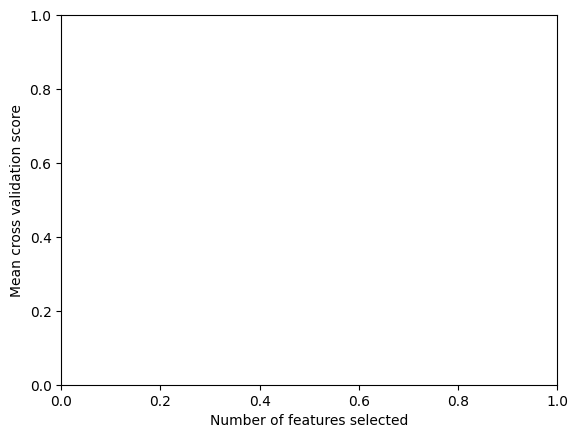

In [7]:
fa.rfecv_plotting()

In [10]:
fa.rfecv.cv_results_

{'mean_test_score': array([0.64966349, 0.64965459, 0.64973686, 0.64970573, 0.64972352,
        0.64972796, 0.64969239]),
 'std_test_score': array([0.00118261, 0.00118705, 0.00115587, 0.00116504, 0.0011594 ,
        0.00115816, 0.00116996]),
 'split0_test_score': array([0.65195882, 0.65195882, 0.65195882, 0.65195882, 0.65195882,
        0.65195882, 0.65195882]),
 'split1_test_score': array([0.64909063, 0.64904616, 0.64945749, 0.64930185, 0.64939079,
        0.64941302, 0.64923515]),
 'split2_test_score': array([0.64946861, 0.64946861, 0.64946861, 0.64946861, 0.64946861,
        0.64946861, 0.64946861]),
 'split3_test_score': array([0.64859036, 0.64859036, 0.64859036, 0.64859036, 0.64859036,
        0.64859036, 0.64859036]),
 'split4_test_score': array([0.64920901, 0.64920901, 0.64920901, 0.64920901, 0.64920901,
        0.64920901, 0.64920901])}

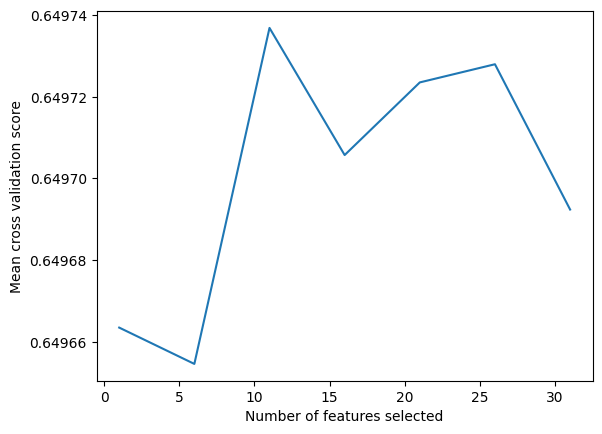

In [15]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean cross validation score")
plt.plot(range(1, len(fa.rfecv.cv_results_["split0_test_score"])*5 + 1, 5), fa.rfecv.cv_results_["mean_test_score"])
plt.show()